In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import pathlib
from sklearn.decomposition import PCA


In [178]:
feature = 'star_count'
feature_list = ['symbol','pr_count','issues_count','commit_add_sum','commit_del_sum','commit_count',
                'star_count','close','high','low','open','usd_market_cap','usd_volume']
coins = ['BTC', 'BCH', 'BCD', 'BTG', 'DASH', 'DCR', 'DOGE', 'ETN', 'LTC', 'PIVX', 'XLM', 'XMR', 
                'XRB', 'XRP', 'ZEC','ADA', 'ARK', 'BTS', 'DGB', 'DRGN', 'EOS', 'FCT', 'GNT', 'LSK', 
                'NEO', 'OMG', 'QTUM', 'REP', 'RHOC', 'SNT', 'STEEM', 'STRAT', 'WAVES','ZRX','ETH','SC','BCN',
               'XVG','ZCL']

In [179]:
dfs = []
hist_symbol = []
feat_cols = []
for path in pathlib.Path("github_data").iterdir():
    filename = path.name
    symbol = filename.split('.')[0]
    #name=('{}_'+feature).format(symbol)
    sdf = pd.read_csv(path,
                          usecols=[feature_list.index(feature)],
                          header=0,
                          #names=[('{}_'+feature).format(symbol)])
                          names=[symbol])
    #feat_cols.append(name)
    feat_cols.append(symbol)
    dfs.append(sdf)
    hist_symbol.append(symbol)
hist_symbol = set(hist_symbol)



In [180]:
feature_df = pd.concat(dfs, axis=1)
feature_df.describe()

,ADA,ARK,BCH,BCN,BTC,BTG,BTS,DASH,DCR,DGB,...,STRAT,WAVES,XLM,XMR,XRB,XRP,XVG,ZCL,ZEC,ZRX
count,135.000000,257.000000,205.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,181.000000
mean,12.718519,0.482490,2.326829,1.085603,57.470817,1.941634,1.828794,1.844358,0.797665,0.622568,...,0.603113,1.346304,3.280156,7.272374,6.389105,4.486381,4.731518,0.498054,4.556420,1.795580
std,11.771235,0.976624,2.744962,1.284092,38.263786,3.888145,1.618336,1.662752,1.095942,1.027720,...,3.344490,1.400584,5.238764,5.317620,14.045280,6.096939,15.044527,1.417316,2.763767,1.939983
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000
50%,9.000000,0.000000,2.000000,1.000000,43.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,6.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
75%,19.000000,1.000000,3.000000,2.000000,72.000000,2.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,2.000000,4.000000,9.000000,4.000000,5.000000,2.000000,0.000000,6.000000,2.000000
max,57.000000,10.000000,24.000000,8.000000,194.000000,26.000000,8.000000,8.000000,9.000000,6.000000,...,49.000000,6.000000,31.000000,29.000000,89.000000,41.000000,165.000000,15.000000,19.000000,10.000000


In [181]:
feature_df = feature_df.fillna(0)

## Perform PCA on _feature_df_  for both the first 2 principal components and 3 components

In [182]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(feature_df[feat_cols].values)

feature_df['pca-one'] = pca_result[:,0]
feature_df['pca-two'] = pca_result[:,1] 
feature_df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.5704743  0.12209294 0.10003799]


## t-SNE on 2 and 3 components

In [184]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_df[feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 257 samples in 0.056s...
[t-SNE] Computed neighbors for 257 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 257 / 257
[t-SNE] Mean sigma: 8.721321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.415577
[t-SNE] Error after 300 iterations: 0.375539
t-SNE done! Time elapsed: 2.901494026184082 seconds


In [186]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_df[feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 257 samples in 0.001s...
[t-SNE] Computed neighbors for 257 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 257 / 257
[t-SNE] Mean sigma: 8.721321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 122.020691
[t-SNE] Error after 300 iterations: 3.234516
t-SNE done! Time elapsed: 2.91393780708313 seconds


## Map symbols to coin function labels before plotting

In [ ]:
#labels = {'ADA':'utility','BTC':'payment', 'BCH':'payment', 'BCD':'payment', 'BTG':'payment', 'DASH':'payment', 'DCR':'payment', 
#    'DOGE':'payment', 'ETN':'payment', 'LTC':'payment', 'PIVX':'payment', 'XLM':'payment', 'XMR':'payment', 
#    'XRB':'payment', 'XRP':'payment', 'ZEC':'payment','ARK':'utility', 'BTS':'utility', 
#    'DGB':'utility', 'DRGN':'utility', 'EOS':'utility', 'FCT':'utility', 'GNT':'utility', 'LSK':'utility', 
#    'NEO':'utility', 'OMG':'utility', 'QTUM':'utility', 'REP':'utility', 'RHOC':'utility', 'SNT':'utility', 
#    'STEEM':'utility', 'STRAT':'utility', 'WAVES':'utility','ZRX':'utility','ETH':'payment_utility',
#    'SC':'asset_utility','BCN':'unknown','XVG':'unknown', 'ZCL':'unknown'}

In [188]:
#labels[symbol]
#for i in coins:
    #print(i + " " + labels[i])

In [190]:
feature_df.rename(columns={'ADA':'utility','BTC':'payment', 'BCH':'payment', 'BCD':'payment', 'BTG':'payment', 'DASH':'payment', 'DCR':'payment', 
    'DOGE':'payment', 'ETN':'payment', 'LTC':'payment', 'PIVX':'payment', 'XLM':'payment', 'XMR':'payment', 
    'XRB':'payment', 'XRP':'payment', 'ZEC':'payment','ARK':'utility', 'BTS':'utility', 
    'DGB':'utility', 'DRGN':'utility', 'EOS':'utility', 'FCT':'utility', 'GNT':'utility', 'LSK':'utility', 
    'NEO':'utility', 'OMG':'utility', 'QTUM':'utility', 'REP':'utility', 'RHOC':'utility', 'SNT':'utility', 
    'STEEM':'utility', 'STRAT':'utility', 'WAVES':'utility','ZRX':'utility','ETH':'payment_utility',
    'SC':'asset_utility','BCN':'unknown','XVG':'unknown', 'ZCL':'unknown'},
                 inplace=True)
#print(feature_df)

In [ ]:
#print(feature_df.columns.values)
#for i in range(0,38):
    #print(feature_df.columns[i])

## Plot PCA for both the 1st 2 principal components and 3 components

In [193]:
from ggplot import *

chart = ggplot(feature_df, aes(x='pca-one', y='pca-two', color=feature_df.columns) ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

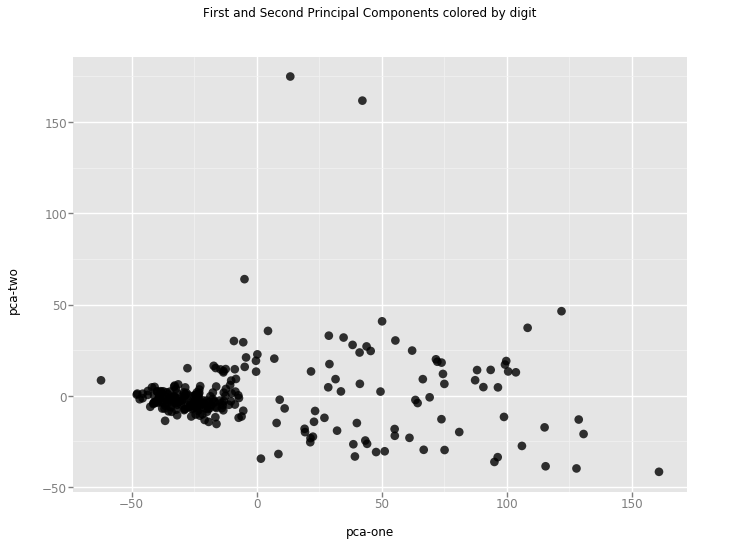

<ggplot: (7551748381)>

In [194]:
from ggplot import *

chart = ggplot(feature_df, aes(x='pca-one', y='pca-two') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

## Plot t-SNE 

Visualise the two dimensions by creating a scatter plot and coloring each sample by its respective label

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

3 Components

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart